<a href="https://colab.research.google.com/github/Shubhankar9934/Shubhankar9934/blob/main/ANN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd

Epoch 1/100
536/536 [==============================] - 7s 7ms/step - loss: 0.7885 - accuracy: 0.5212 - val_loss: 0.5864 - val_accuracy: 0.6888
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5253 - accuracy: 0.7710 - val_loss: 0.5019 - val_accuracy: 0.7902
Epoch 3/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4885 - accuracy: 0.7947 - val_loss: 0.4859 - val_accuracy: 0.7925
Epoch 4/100
536/536 [==============================] - 4s 8ms/step - loss: 0.4761 - accuracy: 0.7955 - val_loss: 0.4755 - val_accuracy: 0.7936
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4667 - accuracy: 0.7964 - val_loss: 0.4671 - val_accuracy: 0.7944
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4583 - accuracy: 0.7977 - val_loss: 0.4594 - val_accuracy: 0.7936
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4505 - accuracy: 0.8001 - val_loss: 0.4527 - val_accuracy: 0.7963

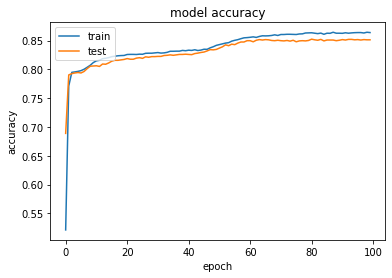

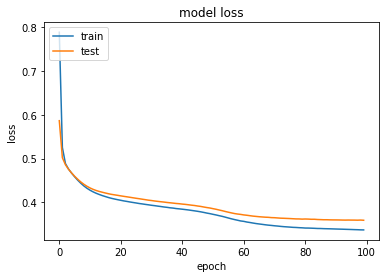

0.8575

In [5]:
# Artificial Neural Network


# Data Preprocessing

# Importing the Libraries
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

dataset = pd.read_csv('/content/drive/MyDrive/Google Colab/ANN/Churn_Modelling.csv')
X = dataset.iloc[: ,3:13]
y = dataset.iloc[:,13]

# Create Dummy Feature/Variables

geography = pd.get_dummies(data = X["Geography"],drop_first=True)
gender = pd.get_dummies( data= X["Gender"],drop_first=True)


# Concatenate the DataFrame

X = pd.concat([X,geography,gender],axis = 1)

## Drop Unnecessory Columns

X = X.drop(['Geography','Gender'],axis = 1)

# Splitting the Dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train,y_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Importing The Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Intialiation Of ANN

classifier = Sequential()

# Adding the input layer and first hidden layer
classifier.add(Dense(units= 6,kernel_initializer='he_uniform',activation='relu',input_dim= 11))
#classifier.add(Dropout(0.3))
# Adding the Second Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
#classifier.add(Dropout(0.2))
# Adding the output layer

classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax',loss = 'binary_crossentropy',metrics = ['accuracy'])

# fitting the ANN to training set
model_history = classifier.fit(X_train,y_train,batch_size= 10,epochs=100,validation_split=0.33)

# list all data in history

print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

score



Test Weather GPU is Working

In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Cheak which GPU we are using

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17163915852113220110
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5775035648863436575
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]